## 1. Exploratory Data Analysis

In [1]:
# Installing Packages
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from statsmodels.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoLarsIC
from sklearn.model_selection import train_test_split

In [2]:
# Load data
data = pd.read_csv('/Users/sadhanha/Desktop/Event_entry.csv')
data.head()

,Entry,TicketClass,Sex,Age,Price,Order,Name,Ticket Number,Bank Balance
0,0,3,male,22.0,7,1,"Braund, Mr. Owen Harris",648155,74389
1,1,1,female,38.0,71,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",119239,94932
2,1,3,female,26.0,8,3,"Heikkinen, Miss. Laina",411408,26146
3,1,1,female,35.0,53,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",530093,35627
4,0,3,male,35.0,8,5,"Allen, Mr. William Henry",510583,60457


In [3]:
cols_to_drop=[]
def display_missing_perc(data):
    for col in data.columns.tolist():
        missing_value = 100*(data[col].isnull().sum()/len(data[col]))
        print(f'{col} column missing values: {missing_value}')
        if missing_value >= 40:
            cols_to_drop.append(col)
    print('\n')
display_missing_perc(data)
print(cols_to_drop)

Entry column missing values: 0.0
TicketClass column missing values: 0.0
Sex column missing values: 0.0
Age column missing values: 20.13808975834292
Price column missing values: 0.0
Order column missing values: 0.0
Name column missing values: 0.0
Ticket Number column missing values: 0.0
Bank Balance column missing values: 0.0


[]


In [4]:
# Fill missing values with mean
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [5]:
cols_to_drop=[]
def display_missing_perc(data):
    for col in data.columns.tolist():
        missing_value = 100*(data[col].isnull().sum()/len(data[col]))
        print(f'{col} column missing values: {missing_value}')
        if missing_value >= 40:
            cols_to_drop.append(col)
    print('\n')
display_missing_perc(data)
print(cols_to_drop)

Entry column missing values: 0.0
TicketClass column missing values: 0.0
Sex column missing values: 0.0
Age column missing values: 0.0
Price column missing values: 0.0
Order column missing values: 0.0
Name column missing values: 0.0
Ticket Number column missing values: 0.0
Bank Balance column missing values: 0.0


[]


In [6]:
# To find the data type of the 'Sex' column
sex_column_type = data['Sex'].dtype

print(sex_column_type)
print(data['Sex'].unique())

object
['male' 'female']


### Visualizations

In [7]:
sns.set_style("whitegrid")

Text(0.5, 1.0, 'Age Distribution')

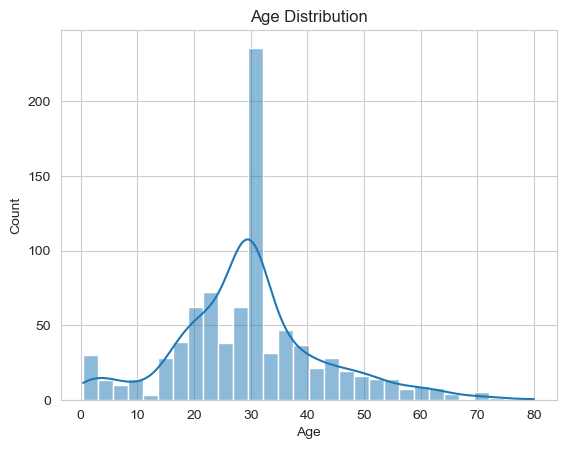

In [8]:
sns.histplot(data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')

#### Insights:

> Close to 300 people have an average age of around 30 years

<Axes: xlabel='TicketClass', ylabel='Bank Balance'>

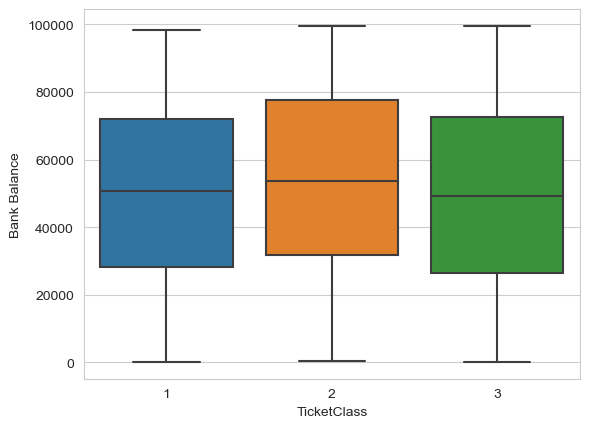

In [9]:
sns.boxplot(x='TicketClass', y='Bank Balance', data=data)

#### Insights:

> Almost all 3 classes have an average bank balance of around 50,0000. Class 2 being the highest amongst the 3.

<Axes: xlabel='Age', ylabel='Price'>

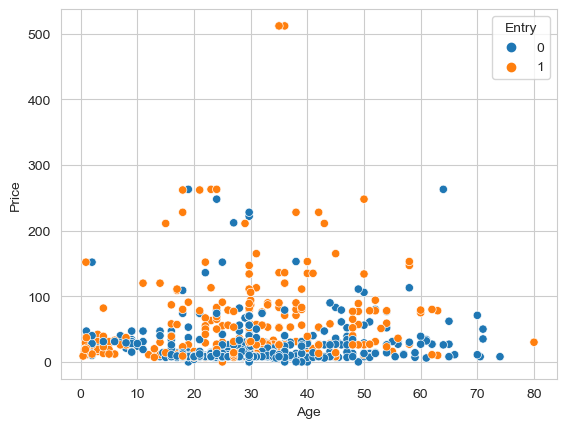

In [10]:
sns.scatterplot(x='Age', y='Price', hue='Entry', data=data)

#### Insights:

> Age and Price dont seem to show any kind of linear relationship, price seems to be scattered around the age range 

/Users/sadhanha/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x1200 with 0 Axes>

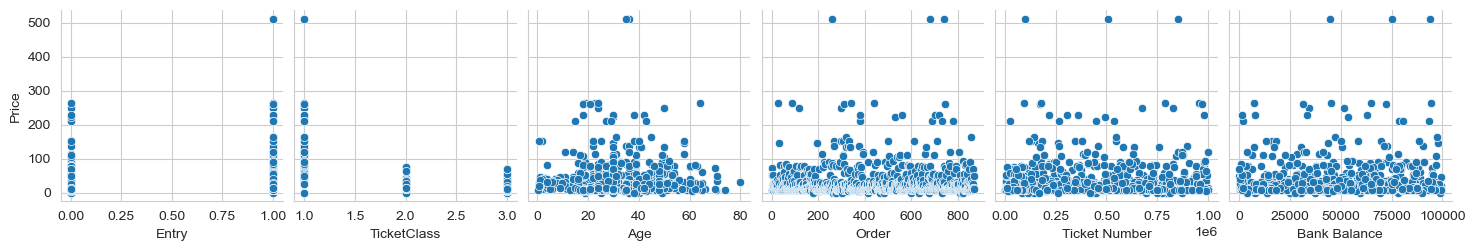

In [11]:
plt.figure(figsize=(18,12))
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
sns.pairplot(data, x_vars=[col for col in numeric_cols if col!='Price'],
             y_vars='Price', kind='scatter')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

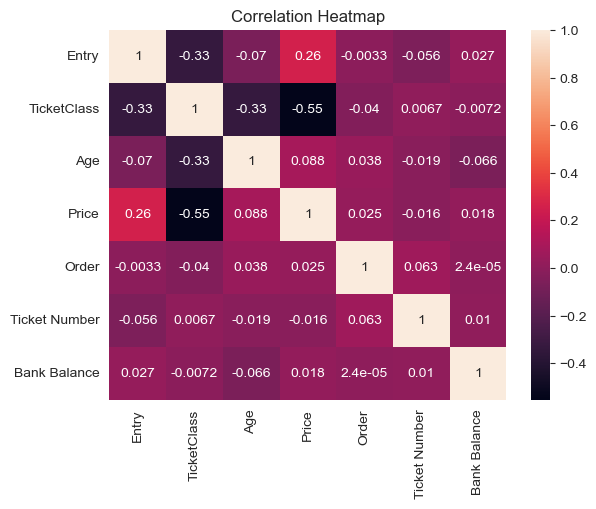

In [12]:
# Heat Map
numeric_cols = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(),annot=True)
plt.title('Correlation Heatmap')

#### Insights:

> There's a strong correlation (0.54) between Sex and Entry. This indidcates that as Sex increases, so does Entry.

> There's a moderate negative correlation (-0.33) between Entry and Ticket Class which suggests that as Entry increases, Ticket Class decreses and vice versa

## 2. PCA Analysis

In [13]:
# Encode 'male' as 0 and 'female' as 1
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Verify that the encoding is correct
print(data[['Sex']].head())

   Sex
0    0
1    1
2    1
3    1
4    0


In [14]:
# Convert the float column to int
data['Age'] = data['Age'].astype(int)
print(data[['Age']].head())

   Age
0   22
1   38
2   26
3   35
4   35


In [15]:
# Drop the target variable and any non-numeric columns
X = data.select_dtypes(include=[np.number]).drop(['Entry'], axis=1)
X_split = add_constant(X)
y_split = data['Entry']  # Target variable

X_split.head()

,const,TicketClass,Sex,Age,Price,Order,Ticket Number,Bank Balance
0,1.0,3,0,22,7,1,648155,74389
1,1.0,1,1,38,71,2,119239,94932
2,1.0,3,1,26,8,3,411408,26146
3,1.0,1,1,35,53,4,530093,35627
4,1.0,3,0,35,8,5,510583,60457


In [16]:
y_split.head()

0    0
1    1
2    1
3    1
4    0
Name: Entry, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_split, y_split, test_size=0.2, random_state=42)

In [18]:
X_train.head()

,const,TicketClass,Sex,Age,Price,Order,Ticket Number,Bank Balance
762,1.0,3,0,20,7,763,427343,5454
670,1.0,2,1,40,39,671,128718,34902
457,1.0,1,1,29,52,458,373563,60048
522,1.0,3,0,29,7,523,304315,75761
743,1.0,3,0,24,16,744,37747,53598


In [19]:
y_train.head()

762    1
670    1
457    1
522    0
743    0
Name: Entry, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Lasso with ATLEAST 6 dimensions (original model)

from sklearn.linear_model import Lasso, LogisticRegression

lasso_main = LogisticRegression(penalty='l1',solver='liblinear')
lasso_main.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

AUC : 0.7868574528685746


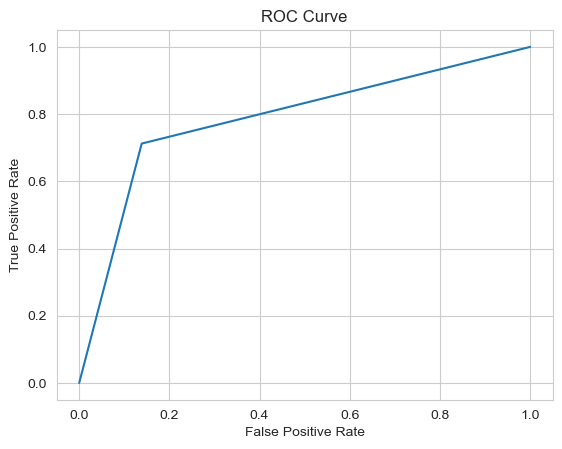

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score,auc

# Predict on test set
y_test_pred = lasso_main.predict(X_test_scaled)

# Threshold probabilities to get binary predictions
threshold = 0.5
y_pred_binary = (y_test_pred >= threshold).astype(int)

#ROC curve
fpr,tpr,thresholds= roc_curve(y_test,y_test_pred)

#AUC
AUC= auc(fpr,tpr)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

print(f'AUC : {AUC}')

In [23]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
accuracy

0.7988505747126436

#### Insights:

> The model classifies entries with an accuracy of 79%, with an AUC of 78%. The ROC curve suggests good classification performance. Overall indicating that the model has a good predictive ability. 

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



n_components= [2, 4, 6]

# Loop over the number of components
for i in n_components:
    
    # Apply PCA
    pca = PCA(n_components=i)
    
    X_train, X_test, y_train, y_test = train_test_split(X_split, y_split, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Fit the LASSO model
    lasso_model = LogisticRegression(penalty='l1',solver='liblinear')
    lasso_model.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = lasso_model.predict(X_test_pca)

    # Threshold probabilities to get binary predictions
    threshold = 0.5
    y_pred_binary = (y_pred >= threshold).astype(int)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred_binary)
    
    # Printing accuracies for 2, 4, 6 dimensions
    print(f"The accuracy for a {i} dimension PCA: {accuracy}")

The accuracy for a 2 dimension PCA: 0.7758620689655172
The accuracy for a 4 dimension PCA: 0.764367816091954
The accuracy for a 6 dimension PCA: 0.7873563218390804


#### Insights:

> The accuracy is highest when 6 components are used and lowest with 4. Interestingly, the model with only 2 components doesn't perform much worse than the one with 4, suggesting that most of the variability in the data can be captured with just 2 components.

> When compared to the original Logistic Regression model, the original one has a higher accuracy (79%) and performs better than PCA.

## 3. Decision Tree Analysis

In [25]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Filtering out non-numeric columns and columns with all null values
numeric_data = data.select_dtypes(include=[np.number])

# Add a constant term (intercept) to the predictors
X_numeric = add_constant(numeric_data)

# Create a DataFrame to hold VIF scores
vif_data = pd.DataFrame()
vif_data["Variable"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

print(vif_data)

        Variable        VIF
0          const  45.140032
1          Entry   1.622605
2    TicketClass   1.796251
3            Sex   1.448600
4            Age   1.195319
5          Price   1.481434
6          Order   1.009819
7  Ticket Number   1.008862
8   Bank Balance   1.006584


In [26]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

# Split dataset to train/test
X_train, X_test, y_train, y_test = train_test_split(X_split, y_split, test_size=0.2, random_state=42)

# Scale the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model_tree = tree.DecisionTreeClassifier(max_depth=3)
model_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

In [27]:
# Predicting test data
y_test_pred_tree = model_tree.predict(X_test_scaled)

# Accuracy of test data
acc_test = accuracy_score(y_test, y_test_pred_tree)

print(f'Accuracy of test data using decision trees: {acc_test}')

Accuracy of test data using decision trees: 0.7873563218390804


In [28]:
from sklearn.metrics import mean_squared_error

# Calcuate MSE
mse = mean_squared_error(y_test, y_test_pred_tree)

print('MSE: {:.3f}'.format(mse))

MSE: 0.213


#### Insights:

> The Decision Tree model correctly predicts the entries with an accuracy of 78.7%

> Lower MSE indicates that the model is closely predicting to the actual classification

## 4. K-Means Clustering

In [29]:
Selected_K = data.iloc[:,3:5]
print(Selected_K)

     Age  Price
0     22      7
1     38     71
2     26      8
3     35     53
4     35      8
..   ...    ...
864   24     13
865   42     13
866   27     14
867   31     50
868   29     10

[869 rows x 2 columns]


In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Scale the data
ms = MinMaxScaler()
scaled_data = ms.fit_transform(Selected_K)
scaled_df = pd.DataFrame(scaled_data, columns=Selected_K.columns)  # Ensure columns are correctly assigned

# Perform K-Means Clustering (k=2)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_df)

# You might want to attach the cluster labels to your original/scaled DataFrame to analyze the clusters
scaled_df['Cluster_k_2'] = kmeans.labels_

# Print the result
scaled_df

/Users/sadhanha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Age,Price,Cluster_k_2
0,0.2750,0.013672,0
1,0.4750,0.138672,1
2,0.3250,0.015625,0
3,0.4375,0.103516,0
4,0.4375,0.015625,0
...,...,...,...
864,0.3000,0.025391,0
865,0.5250,0.025391,1
866,0.3375,0.027344,0
867,0.3875,0.097656,0


In [31]:
# Perform K-Means Clustering (k=4)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_df)

# You might want to attach the cluster labels to your original/scaled DataFrame to analyze the clusters
scaled_df['Cluster_k_4'] = kmeans.labels_

# Print the result
scaled_df

/Users/sadhanha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Age,Price,Cluster_k_2,Cluster_k_4
0,0.2750,0.013672,0,0
1,0.4750,0.138672,1,1
2,0.3250,0.015625,0,0
3,0.4375,0.103516,0,0
4,0.4375,0.015625,0,0
...,...,...,...,...
864,0.3000,0.025391,0,0
865,0.5250,0.025391,1,1
866,0.3375,0.027344,0,0
867,0.3875,0.097656,0,0


In [32]:
# Perform K-Means Clustering (k=6)
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(scaled_df)

# You might want to attach the cluster labels to your original/scaled DataFrame to analyze the clusters
scaled_df['Cluster_k_6'] = kmeans.labels_

# Print the result
scaled_df

/Users/sadhanha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Age,Price,Cluster_k_2,Cluster_k_4,Cluster_k_6
0,0.2750,0.013672,0,0,1
1,0.4750,0.138672,1,1,3
2,0.3250,0.015625,0,0,1
3,0.4375,0.103516,0,0,1
4,0.4375,0.015625,0,0,1
...,...,...,...,...,...
864,0.3000,0.025391,0,0,1
865,0.5250,0.025391,1,1,3
866,0.3375,0.027344,0,0,1
867,0.3875,0.097656,0,0,1


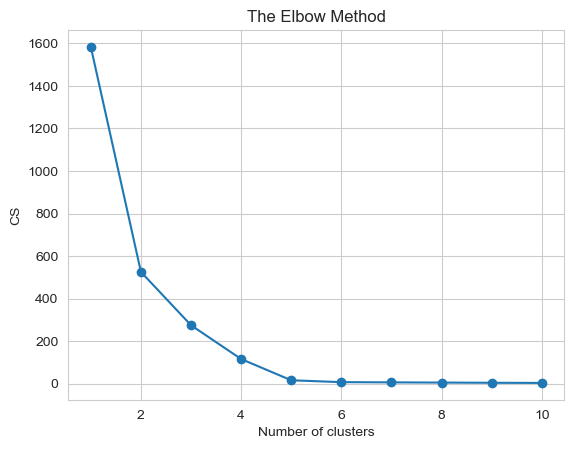

In [33]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

#### Insights:

> The appropriate K value seems to be 3 as the elbow seems to be between 2 and 4

In [34]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_df)

# You might want to attach the cluster labels to your original/scaled DataFrame to analyze the clusters
scaled_df['Best_kmeans_cluster'] = kmeans.labels_

# Print the result
scaled_df

/Users/sadhanha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Age,Price,Cluster_k_2,Cluster_k_4,Cluster_k_6,Best_kmeans_cluster
0,0.2750,0.013672,0,0,1,0
1,0.4750,0.138672,1,1,3,1
2,0.3250,0.015625,0,0,1,0
3,0.4375,0.103516,0,0,1,0
4,0.4375,0.015625,0,0,1,0
...,...,...,...,...,...,...
864,0.3000,0.025391,0,0,1,0
865,0.5250,0.025391,1,1,3,1
866,0.3375,0.027344,0,0,1,0
867,0.3875,0.097656,0,0,1,0


In [35]:
scaled_df['Best_kmeans_cluster'].value_counts()

Best_kmeans_cluster
0    553
1    163
2    153
Name: count, dtype: int64

/Users/sadhanha/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


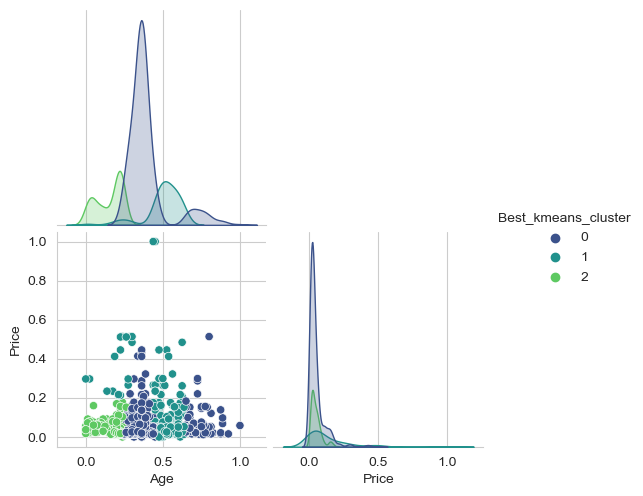

In [36]:
# First, ensure that the 'cluster' column is of a categorical type for better color handling
scaled_df['Best_kmeans_cluster'] = scaled_df['Best_kmeans_cluster'].astype('category')
scaled_df_B = scaled_df.iloc[:, [0,1,5]]
scaled_df_B

# Create the pairplot
sns.pairplot(scaled_df_B, hue='Best_kmeans_cluster', palette='viridis', corner=True)
plt.show()

#### Insights:

> There is some overlap between clusters, where the density plots for 'Age' and 'Price' intersect. This suggests that while distinct clusters are present

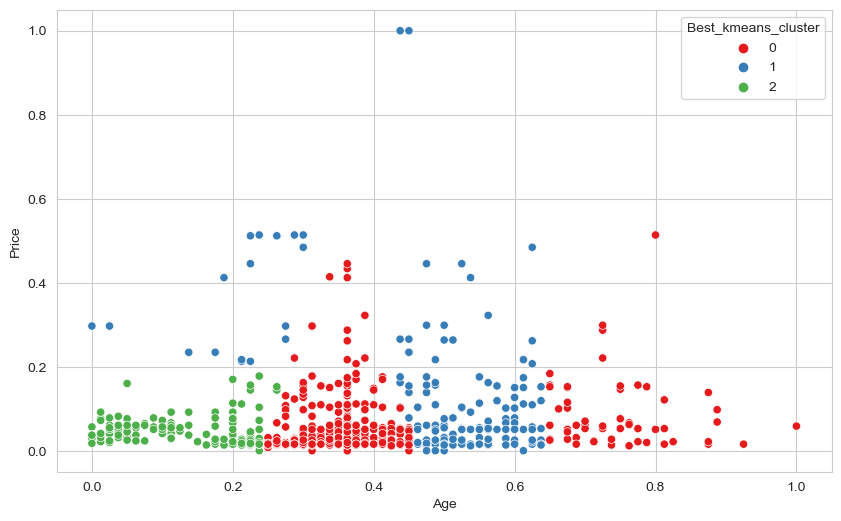

In [37]:
plt.figure(figsize=(10,6))  # Optional: You can specify the figure size
sns.scatterplot(data=scaled_df_B, x='Age', y='Price', hue='Best_kmeans_cluster', palette='Set1')
plt.show()

In [38]:
from sklearn.metrics import silhouette_score

silhouette_score(scaled_df_B.iloc[:, :2], kmeans.labels_)

0.3271807039419752

#### Insights:

> The clusters appear to be well separated in the scatter plot, with very minimal overlap. This separation indicates that the K-means algorithm was able to find a clear structure in the data 

> The cluster represented by the red color seems to have a wider spread in terms of 'Price' compared to the other clusters

> A score of 0.32 suggests that the clusters are moderately distinct and are separated from each other. While not close to 1, which would indicate very distinct clusters, the score still suggests an acceptable level of separation